# Exploratory Analysis of the 'Soccer' Dataset


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

The dataset that will be explored in this project is the 'Soccer' dataset, which is in a 'SQLite database' format. The database contains multiple tables which must be joined in order to answer questions about the data.
<br>
<br>
The questions that will be asked are the following:
<ol>
    <li>Which country/league has the most skilled soccer players?</li>
    <li>Which team has the fastest players?</li>
    <li>What is the relationship between weight and speed?</li>
    <li>What is the relationship between age and overall rating?</li>
    <li>Which players have improved the most between 2014 and 2016?</li>
</ol>

<a id='wrangling'></a>
## Data Wrangling

### General Properties

First, the libraries that will be required for this anlaysis must be imported.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3 as sql
from datetime import date

Next, a connection must be created with the SQL database.

In [3]:
connection = sql.connect('database.sqlite')

Then, the tables available in the database must be explored in order to ascertain which ones will be helpful in answering the research questions.

In [4]:
pd.read_sql_query("SELECT * from sqlite_master WHERE type='table'", connection)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


First, the Players_Attributes table will be explored.

In [5]:
pd.read_sql_query("""SELECT *
                    FROM Player_Attributes;""", connection).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

This table contains a series of quantitative attributes which rate a player's ability (rating out of 100) at a given point in time. The 'overall_rating' field and the 'sprint_speed' field may be useful in answering some questions.

Next, the Player table will be explored.

In [6]:
pd.read_sql_query("""SELECT *
                    FROM Player;""", connection).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


This table contains a series of descriptive traits about the players. The 'player_name' field and the the 'weight' field may help answer some questions.

In [7]:
list(pd.read_sql_query("""SELECT *
                    FROM Match;""", connection).columns)

#The columns method is applied to the query and is cast in a list so that the result details all columns

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player

This table contains records of matches played, including information such as the home team, the away team, the players on each side, the score, etc. Note that this is the only table which ties the player names to the team they play for and the league/country they play in. Fields such as 'home_player_...' as well as 'country_id' and 'league_id' may be helful in answering some questions.

In [8]:
pd.read_sql_query("""SELECT *
                    FROM League;""", connection).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


This table contains a list of leagues. The 'name' field may help with some questions.

In [9]:
pd.read_sql_query("""SELECT *
                    FROM Country;""", connection).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


This table contains a list of countries. The 'name' field may help with some questions.

In [10]:
pd.read_sql_query("""SELECT *
                    FROM Team;""", connection).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


This table contains a list of teams. The 'team_long_name' may be helpful to answer some questions.

In [11]:
pd.read_sql_query("""SELECT *
                    FROM Team_Attributes;""", connection).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

This table contains a list of team attributes. While this information may be interesting for a future analysis, it falls outside the scope of the research questions.

#### Table Creation

In order to answer the research questions, a table identifying all players and a series of attributes (such as which team they play for, their speed rating, their age, etc.) must be created.

In light of the information gathered on each table above, the following steps must be followed:
<ul>
    <li> Modify the Match table to create a list of players per team.</li>
    <li> Join the player attributes to this new table.</li>
    <li> Join the information from the Team and Country tables to the table.</li>

First, the Match table will be queried to select a list of all home players in a game. The information for non-starting players is not available. Furthermore, it is assumed that all teams will alternate playing at home and away - therefore, only home players are selected in the query. Null values are excluded in the query.

In [12]:
match = pd.read_sql_query("""SELECT home_team_api_id, country_id, league_id, 
                    home_player_1, home_player_2, 
                    home_player_3, home_player_4, home_player_5, 
                    home_player_6, home_player_7, home_player_8, 
                    home_player_9, home_player_10, home_player_11
                    FROM Match
                    WHERE
                    home_player_1 AND home_player_2 AND home_player_3
                    AND home_player_4 AND home_player_5 AND home_player_6
                    AND home_player_7 AND home_player_8 AND home_player_9 
                    AND home_player_10 AND home_player_11 AND home_team_api_id
                    AND country_id AND league_id IS NOT NULL;""", connection)
match.head()

,home_team_api_id,country_id,league_id,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11
0,8203,1,1,38327,67950,67958,67959,37112,36393,148286,67898,164352,38801,26502
1,8342,1,1,37990,37983,21812,11736,37858,39578,38336,38366,52280,27423,38440
2,10000,1,1,37900,37886,37903,37889,94030,37902,38231,131530,130027,37893,37981
3,9984,1,1,36835,37047,37021,37051,104386,32863,37957,37909,38357,37065,78462
4,8635,1,1,34480,38388,26458,13423,38389,30949,38393,38253,38383,38778,37069


In order to modify the new 'match' table to create a list of players per team, the melt function will be used to collapse the player fields into values in a column. Then, the 'player_api_id' value will be made the index in order to facilitate an inner join with data from the Player and Player Attributes columns.

In [13]:
players = pd.melt(match, id_vars=['home_team_api_id', 'date', 'country_id', 'league_id'], value_vars=match.columns[4:]).sort_values('date', ascending=False).drop(['date', 'variable'], axis=1).drop_duplicates(keep='first').rename(columns={'home_team_api_id': 'team', 'value': 'player_api_id'}).set_index('player_api_id').sort_values('player_api_id', ascending=True)
players.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,team,country_id,league_id
player_api_id,,,
2625,8569,15722,15722
2752,7878,21518,21518
2768,8370,21518,21518
2768,8603,21518,21518
2768,10205,21518,21518


Next, a SQL Join is performed in order to join select values from the Player_Attributes and Player tables and extract the resulting table.

In [14]:
players2 = pd.read_sql_query("""SELECT Player.player_api_id, Player.player_name, 
                    Player.birthday, Player.height, Player.weight, Player_Attributes.overall_rating, 
                    Player_Attributes.sprint_speed, Player_Attributes.date
                    FROM Player
                    JOIN Player_Attributes ON Player_Attributes.player_api_id = Player.player_api_id;""", connection).set_index('player_api_id')
players2.head()

,player_name,birthday,height,weight,overall_rating,sprint_speed,date
player_api_id,,,,,,,
505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,67.0,64.0,2016-02-18 00:00:00
505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,67.0,64.0,2015-11-19 00:00:00
505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,62.0,64.0,2015-09-21 00:00:00
505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,61.0,64.0,2015-03-20 00:00:00
505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,61.0,64.0,2007-02-22 00:00:00


The newly pulled dataframe must then be merged with the first dataframe. 

In [15]:
players = players.merge(players2, how='inner', left_index=True, right_index=True)

Next, the Team and League tables must be queried to join additional information onto the 'players' dataframe.

In [16]:
teams = pd.read_sql_query("""SELECT team_api_id, team_long_name
                    FROM Team;""", connection)
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 2 columns):
team_api_id       299 non-null int64
team_long_name    299 non-null object
dtypes: int64(1), object(1)
memory usage: 4.8+ KB


In [17]:
teams.head()

,team_api_id,team_long_name
0,9987,KRC Genk
1,9993,Beerschot AC
2,10000,SV Zulte-Waregem
3,9994,Sporting Lokeren
4,9984,KSV Cercle Brugge


In [18]:
players = players.merge(teams, how='inner', right_on='team_api_id', left_on='team')

In [19]:
countries = pd.read_sql_query("""SELECT name, id AS country_id
                                FROM
                                Country;""", connection)
countries.head()

,name,country_id
0,Belgium,1
1,England,1729
2,France,4769
3,Germany,7809
4,Italy,10257


In [20]:
players = players.merge(countries, how='inner', right_on='country_id', left_on='country_id')

Finally, all ID columns will be dropped and columns will be renamed to suit the analysis.

In [21]:
players.drop(['team', 'country_id', 'league_id', 'team_api_id'], axis=1, inplace=True)

In [22]:
players.rename(columns={'name':'country', 'player_name':'name', 'team_long_name':'team'}, inplace=True)

## Data Cleaning

First, the data will be inspected in order to look for opportunities to improve the data format to make it suitable for analysis.

In [23]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303324 entries, 0 to 303323
Data columns (total 9 columns):
name              303324 non-null object
birthday          303324 non-null object
height            303324 non-null float64
weight            303324 non-null int64
overall_rating    301976 non-null float64
sprint_speed      301976 non-null float64
date              303324 non-null object
team              303324 non-null object
country           303324 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 23.1+ MB


In [24]:
players.isnull().sum()

name                 0
birthday             0
height               0
weight               0
overall_rating    1348
sprint_speed      1348
date                 0
team                 0
country              0
dtype: int64

Null values identified will be dropped.

In [25]:
players.dropna(inplace=True)

In [26]:
players.head()

,name,birthday,height,weight,overall_rating,sprint_speed,date,team,country
0,"Patryk Rachwal,18",1981-01-27 00:00:00,175.26,154,61.0,63.0,2015-01-16 00:00:00,GKS Bełchatów,Poland
1,"Patryk Rachwal,18",1981-01-27 00:00:00,175.26,154,61.0,63.0,2014-11-07 00:00:00,GKS Bełchatów,Poland
2,"Patryk Rachwal,18",1981-01-27 00:00:00,175.26,154,61.0,63.0,2014-09-18 00:00:00,GKS Bełchatów,Poland
3,"Patryk Rachwal,18",1981-01-27 00:00:00,175.26,154,61.0,63.0,2013-06-07 00:00:00,GKS Bełchatów,Poland
4,"Patryk Rachwal,18",1981-01-27 00:00:00,175.26,154,61.0,63.0,2013-03-08 00:00:00,GKS Bełchatów,Poland


Next, select columns will be converted to their appropriate datatype.

In [27]:
players['birthday'] = pd.to_datetime(players['birthday'])
players['date'] = pd.to_datetime(players['date'])
players['team'] = players['team'].astype(str)
players['overall_rating'] = players['overall_rating'].astype(int)
players['sprint_speed'] = players['sprint_speed'].astype(int)

Next, a function to convert the players' birthday into his age is defined and added to the dataframe under the 'age' column.

In [28]:
def get_age(birthday):
    today = pd.to_datetime(date.today()).year
    return today-birthday.year

In [29]:
players['age'] = players['birthday'].apply(get_age)
players.drop('birthday', axis=1, inplace=True)

In [30]:
players.head()

,name,height,weight,overall_rating,sprint_speed,date,team,country,age
0,"Patryk Rachwal,18",175.26,154,61,63,2015-01-16,GKS Bełchatów,Poland,39
1,"Patryk Rachwal,18",175.26,154,61,63,2014-11-07,GKS Bełchatów,Poland,39
2,"Patryk Rachwal,18",175.26,154,61,63,2014-09-18,GKS Bełchatów,Poland,39
3,"Patryk Rachwal,18",175.26,154,61,63,2013-06-07,GKS Bełchatów,Poland,39
4,"Patryk Rachwal,18",175.26,154,61,63,2013-03-08,GKS Bełchatów,Poland,39


Now, the table is ready for analysis.

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: Which country had the best players in 2016?

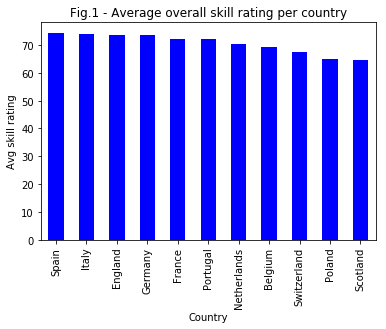

In [31]:
overall_rating_per_country = players.query('date>="2016-01-01"').groupby('country')['overall_rating'].mean().sort_values(ascending=False)
overall_rating_per_country.plot(kind='bar', title='Fig.1 - Average overall skill rating per country', color='blue')
plt.xlabel('Country')
plt.ylabel('Avg skill rating');

### Question 2: Which team had the fastest players in 2016?

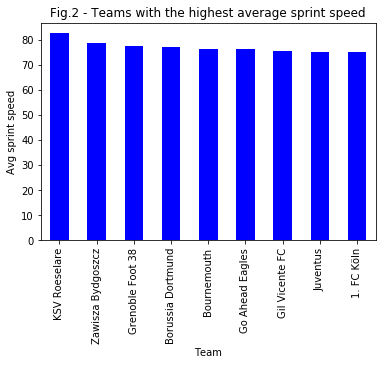

In [32]:
sprint_speed_per_team = players.query('date>="2016-01-01"').groupby('team')['sprint_speed'].mean().sort_values(ascending=False)
sprint_speed_per_team[:9].plot(kind='bar', title='Fig.2 - Teams with the highest average sprint speed', color='blue')
plt.xlabel('Team')
plt.ylabel('Avg sprint speed');

### Question 3: What is the relationship between player weight and speed?

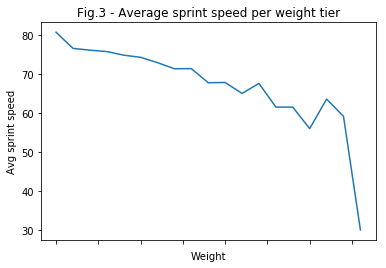

In [33]:
players_2016 = players.query('date>="2016"')
weight_bins = pd.cut(players_2016['weight'], np.arange(players_2016['weight'].min(), players_2016['weight'].max(), 5))
players_2016.groupby(weight_bins)['sprint_speed'].mean().plot(kind='line', title='Fig.3 - Average sprint speed per weight tier') 
plt.xlabel('Weight')
plt.ylabel('Avg sprint speed');

# Question: why are the xticks not apprearing? When I add the parameter 'xticks=list(np.arange(players_2016['weight'].min(), players_2016['weight'].max(), 5))' it gives me a bizarre result.

### Question 4: What is the relationship between player age and overall rating?

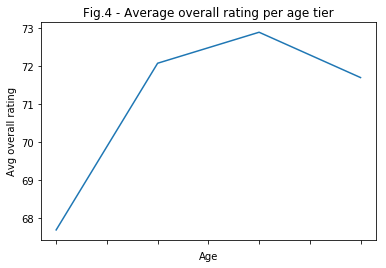

In [34]:
age_bins = pd.cut(players_2016['age'], np.arange(players_2016['age'].min(), players_2016['age'].max(), 5))
players_2016.groupby(age_bins)['overall_rating'].mean().plot(kind='line', title='Fig.4 - Average overall rating per age tier') 
plt.xlabel('Age');
plt.ylabel('Avg overall rating');

# Question: why are the xticks not apprearing? 

### Question 5: Which players have improved the most between 2014 and 2016?

In [35]:
players_14 = players[['name','date', 'overall_rating']].query('date>="2014-01-01"&date<"2015-01-01"').rename(columns = lambda x: x +"_2014")
players_14 = players_14.loc[players_14.groupby('name_2014')['date_2014'].agg(pd.Series.idxmax)]

players_16 = players[['name','date', 'overall_rating']].query('date>="2016-01-01"&date<"2017-01-01"').rename(columns = lambda x: x +"_2016")
players_16 = players_16.loc[players_16.groupby('name_2016')['date_2016'].agg(pd.Series.idxmax)]

In [36]:
players_14to16 = players_14.merge(players_16, how='inner', left_on='name_2014', right_on='name_2016')

In [37]:
players_14to16['overall_rating_increase'] = (players_14to16['overall_rating_2016']/players_14to16['overall_rating_2014'])-1
players_14to16 = players_14to16[['name_2014', 'overall_rating_increase']].sort_values('overall_rating_increase', ascending=False).reset_index().drop('index', axis=1).rename(columns={'name_2014':'name'})

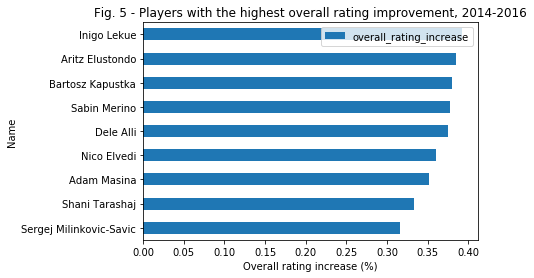

In [38]:
players_14to16.iloc[:9].sort_values('overall_rating_increase', ascending=True).plot(kind='barh', x='name')
plt.title('Fig. 5 - Players with the highest overall rating improvement, 2014-2016')
plt.xlabel('Overall rating increase (%)')
plt.ylabel('Name');

<a id='conclusions'></a>
## Conclusions

In conclusion the following answers can be provided to each of our research questions:
<ol>
    <li> Q1: The countries/leagues with the best players are Spain, followed by Italy, England, Germany, and France.</li>
    <li> Q2: The teams with the fastest players are KSV Roeselare, Zawisza Bydgoszcz, Grenoble Foot 38, Borussia Dortmund, Bournemouth</li>
    <li> Q3: There seems to be an overall negative relationship between player weight and speed.</li>
    <li> Q4: It seems that, on average, younger players have a lower overall skill rating. This rating increases with age, but then dips again towards the end of players' careers.</li>
    <li> Q5: The playesr who have improved the most between 2014 and 2016 are Inigo Lekue, Aritz Elustondo, Bartosz Kapustka, Sabin Merino, and Dele Alli.</li>

In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0